# Case Covid

Revisão geral dos fundamentos

Usaremos: [covid19api](https://covid19api.com)
Documentação [Api](https://documenter.getpostman.com/view/10808728/SzS8rjbc)

In [ ]:
import requests


In [ ]:
url = 'https://covid19-brazil-api.now.sh/api/report/v1'

In [ ]:
requests.get(url)

In [ ]:
print(response.text)

In [ ]:
import requests
# https://covid19-brazil-api-docs.vercel.app

url = 'https://covid19-brazil-api.now.sh/api/report/v1'
headers = {}
payload = {}

response = requests.request('GET', url, data=payload, headers=headers)
print(response.text)

In [ ]:
type(response)

In [ ]:
type(response.text)

In [ ]:
dir(response)

In [ ]:
# jogando o conteudo para json e verificando as chaves que ele tem
content = response.json()
print(content)

In [ ]:
content['data'][0].keys()

In [ ]:
content_data = content['data'][0]
content_data

In [ ]:
# content_data['uid']
# content_data['uf']
# content_data['cases']
# content_data['deaths']
# content_data['suspects']
# content_data['refuses']
# content_data['datetime']

# Reescrevendo a API

A APi divulgada no curso não está funcionando. Entretanto existe uma alternativa de outra api para dar continuidade.

covid19-brazil-api-docs-vercel.app

In [ ]:
import requests
import pandas as pd

In [ ]:
url = 'https://covid19-brazil-api.now.sh/api/report/v1/'

In [ ]:
response = requests.get(url)
response

In [ ]:
response.text

In [ ]:
result = response.json()
dados = result['data']
dados

In [ ]:
df = pd.DataFrame(dados)
df

In [ ]:
df.info()

In [ ]:
# Alterando para países


response  = requests.get(url + 'countries')
result = response.json()
dados = result['data']
dados

In [ ]:
df = pd.DataFrame(dados)
df

In [ ]:
df.info()

In [ ]:
# deletando as colunas vazias
del df['cases']
del df['recovered']

In [ ]:
df

In [ ]:
# verificando duplicados
df.duplicated().any()
# o any é para agrupar e verificar todo o conjunto de dados de forma consolidada
# caso não use o any vai retornar linha a linha do df retornando true ou false

In [ ]:
df.nunique()

In [ ]:
df.drop(columns=['updated_at'], inplace=True)


In [ ]:
df

In [ ]:
df.columns = [
    'pais',
    'total_confirmados',
    'total_obitos',
]
df

In [ ]:
df.to_csv('cleaned_covid.csv', index=False)

# Análise do Arquivo cleaned_covid.csv

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('cleaned_covid.csv')

In [3]:
df

,pais,total_confirmados,total_obitos
0,Afghanistan,209484,7896
1,Albania,334457,3598
2,Algeria,271496,6881
3,Andorra,47890,165
4,Angola,105288,1933
...,...,...,...
196,West Bank and Gaza,703228,5708
197,Winter Olympics 2022,535,0
198,Yemen,11945,2159
199,Zambia,343135,4057


In [4]:
top_confirmados = df[['pais', 'total_confirmados']]\
    .sort_values('total_confirmados', ascending=False)[:10]
top_confirmados

,pais,total_confirmados
186,US,103804263
80,India,44690738
63,France,39866718
67,Germany,38249060
24,Brazil,37085675
88,Japan,33329551
94,"Korea, South",30615522
86,Italy,25603510
190,United Kingdom,24658705
147,Russia,22086064


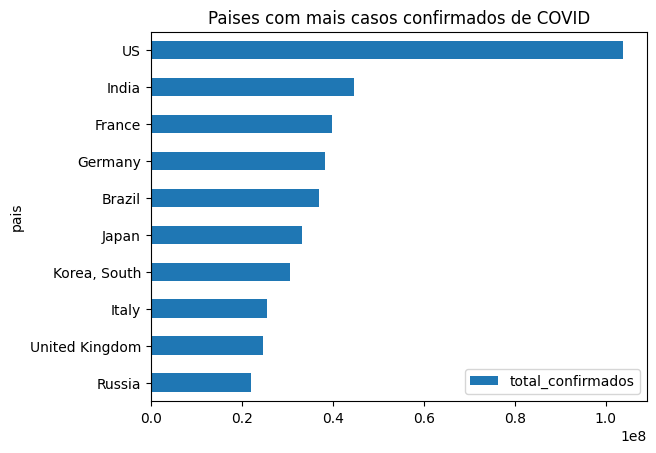

In [11]:
top_confirmados[::-1].plot(
    kind='barh',
    x = 'pais',
    y = 'total_confirmados',
    title = 'Paises com mais casos confirmados de COVID'
);

In [12]:
top_obitos = df[['pais', 'total_obitos']]\
    .sort_values('total_obitos', ascending=False)[:10]
top_obitos

,pais,total_obitos
186,US,1123836
24,Brazil,699310
80,India,530779
147,Russia,388521
117,Mexico,333188
190,United Kingdom,220721
141,Peru,219539
86,Italy,188322
67,Germany,168935
63,France,166176


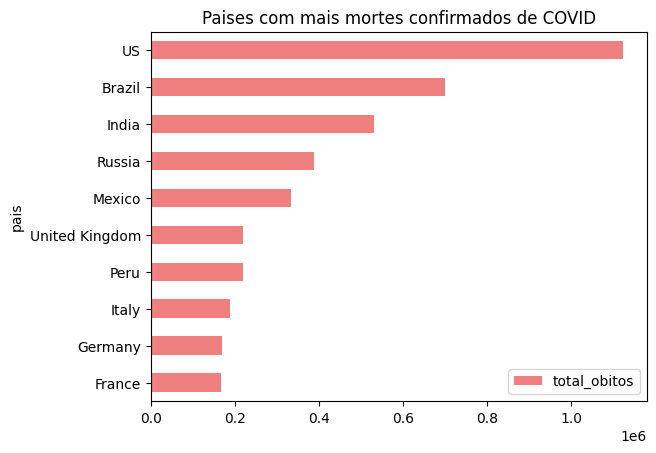

In [15]:
top_obitos[::-1].plot(
    kind='barh',
    x = 'pais',
    y = 'total_obitos',
    title = 'Paises com mais mortes confirmados de COVID',
    color = 'lightcoral'
);

In [16]:
%load_ext sql

In [23]:
%%sql 
sqlite:///covid.db

In [24]:
from sqlalchemy import create_engine

In [25]:
engine = create_engine('sqlite:///covid.db')
engine

Engine(sqlite:///covid.db)

In [26]:
df

,pais,total_confirmados,total_obitos
0,Afghanistan,209484,7896
1,Albania,334457,3598
2,Algeria,271496,6881
3,Andorra,47890,165
4,Angola,105288,1933
...,...,...,...
196,West Bank and Gaza,703228,5708
197,Winter Olympics 2022,535,0
198,Yemen,11945,2159
199,Zambia,343135,4057


In [27]:
df.to_sql('confirmados_obito', engine, if_exists='replace')

201

In [32]:
%%sql

select * from confirmados_obito;

 * sqlite:///covid.db
Done.


index,pais,total_confirmados,total_obitos
0,Afghanistan,209484,7896
1,Albania,334457,3598
2,Algeria,271496,6881
3,Andorra,47890,165
4,Angola,105288,1933
5,Antarctica,11,0
6,Antigua and Barbuda,9106,146
7,Argentina,10044957,130472
8,Armenia,447308,8727
9,Australia,11401996,19578


In [36]:
resultado = %sql select * from confirmados_obito;
resultado

 * sqlite:///covid.db
Done.


index,pais,total_confirmados,total_obitos
0,Afghanistan,209484,7896
1,Albania,334457,3598
2,Algeria,271496,6881
3,Andorra,47890,165
4,Angola,105288,1933
5,Antarctica,11,0
6,Antigua and Barbuda,9106,146
7,Argentina,10044957,130472
8,Armenia,447308,8727
9,Australia,11401996,19578


In [38]:
type(resultado)

sql.run.ResultSet

In [40]:
df = pd.DataFrame(resultado, columns=resultado.keys())

TypeError: 'RMKeyView' object is not callable

In [41]:
df = resultado.DataFrame()


In [42]:
df

,index,pais,total_confirmados,total_obitos
0,0,Afghanistan,209484,7896
1,1,Albania,334457,3598
2,2,Algeria,271496,6881
3,3,Andorra,47890,165
4,4,Angola,105288,1933
...,...,...,...,...
196,196,West Bank and Gaza,703228,5708
197,197,Winter Olympics 2022,535,0
198,198,Yemen,11945,2159
199,199,Zambia,343135,4057
